# matplotlibの使い方

``matplotlib``と``pandas.DataFrame.plot``を組み合わせて利用する方法を確認します。

## モジュールのインポート

In [154]:
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
print(f"matplotlib: {mpl.__version__}")

matplotlib: 3.8.2


- ``matplotlib``で日本語フォントを使えるようにするために、``japanize_matplotlib``もインポート

## カラーマップ名の確認

In [10]:
#mpl.colormaps()
#len(mpl.colormaps()) # 170

- 利用可能なカラーマップ名は``matplotlib.colormaps``で確認
- カラーマップ名は170種類

## 適当なサンプルデータの作成

In [155]:
samples = [
    {
        "x": random.gauss(),
        "y": random.uniform(4, 8),
        "z": random.randint(0, 10),
        "name": random.choice(["Alice", "Bob", "Carol", "David"])
    } for i in range(1000)]
data = pd.DataFrame(samples)
# data

- 乱数モジュール（``random``）を使って、サンプルデータを作成
-`(x, y, z, name)`の組み合わせを作成

# プロットを作成する

matplotlib.axes._axes.Axes

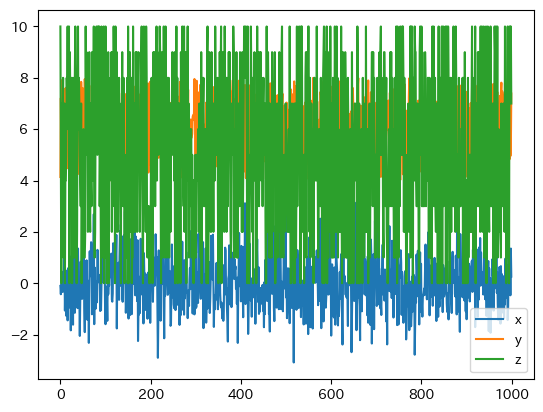

In [156]:
ax = data.plot()
type(ax)

- ``pandas.DataFrame.plot()``でプロットを作成
- デフォルトは折れ線グラフ（数値データのみ）
- プロットは``matplotlib.axes.Axes``オブジェクト
  - ``ax``という変数は、`axis``から来ているのだと思う
  - 日本語だと``軸``なので、なぜグラフを示す変数になるのかピンと来ないのだけど、英語圏だと馴染みがあるのだろうか？

# サブプロットしたい

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

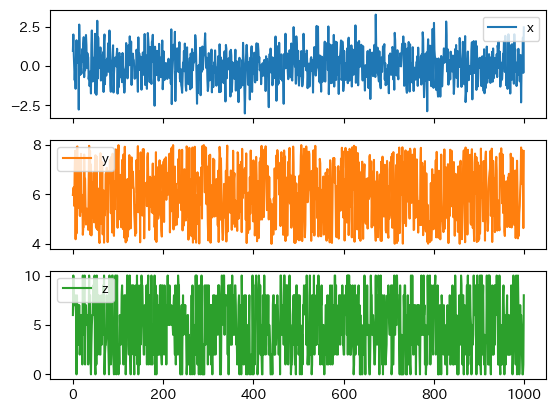

In [114]:
data.plot(subplots=True)

- ``subplots=True``オプションでサブプロットに自動分割

# 目盛りしたい

<Axes: >

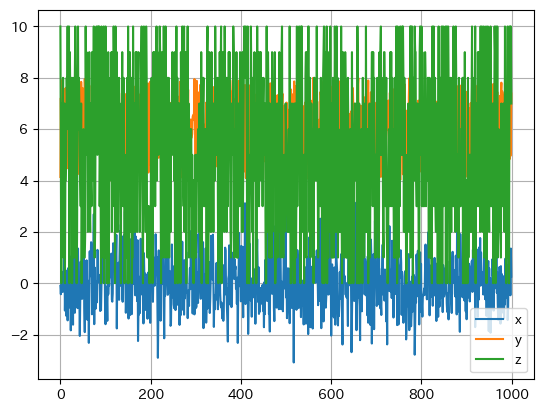

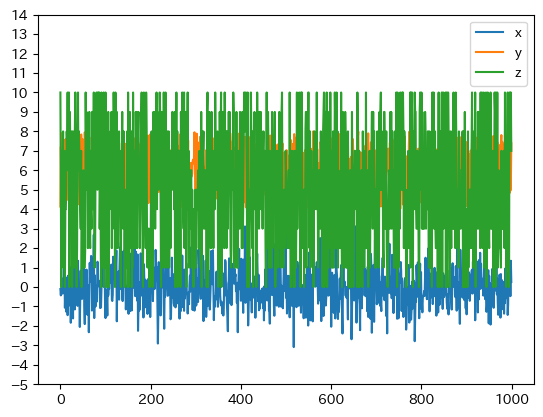

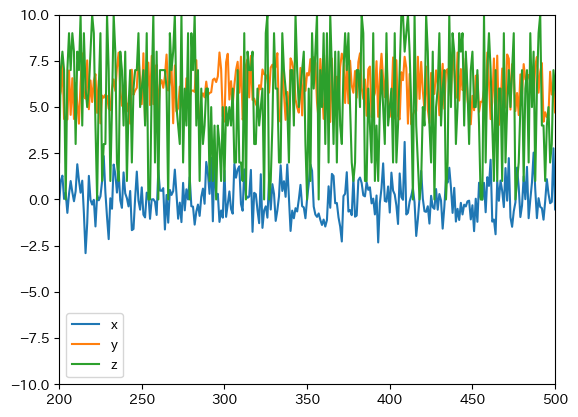

In [172]:
data.plot(grid=True)
data.plot(yticks=range(-5, 15, 1))
data.plot(xlim=(200, 500), ylim=(-10,10))

- ``grid=True``オプションで目盛りを表示

# 対数グラフしたい

<Axes: >

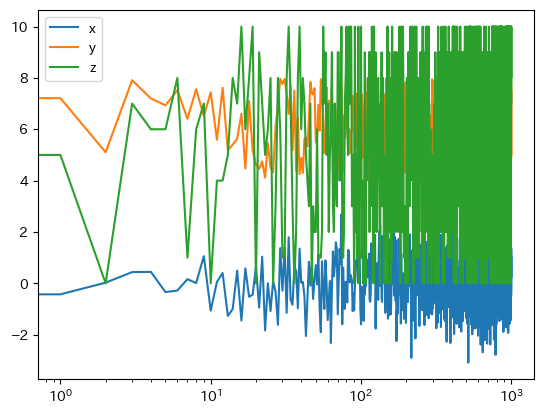

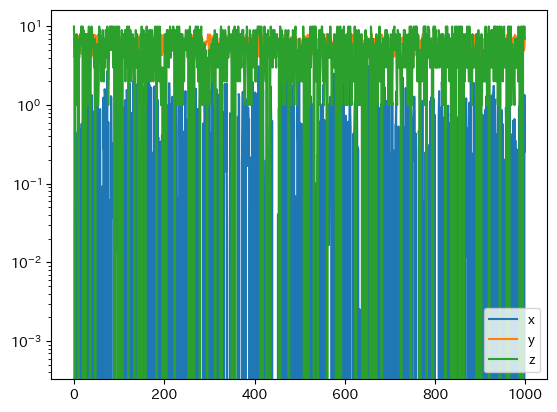

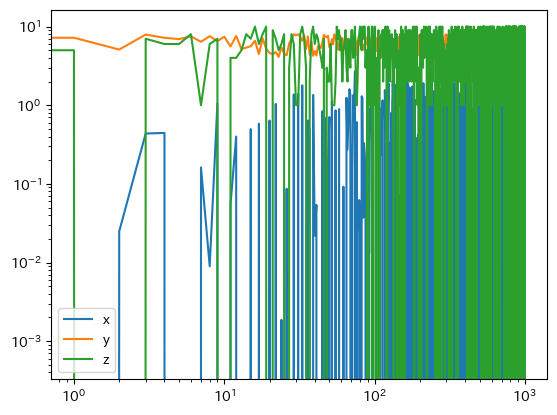

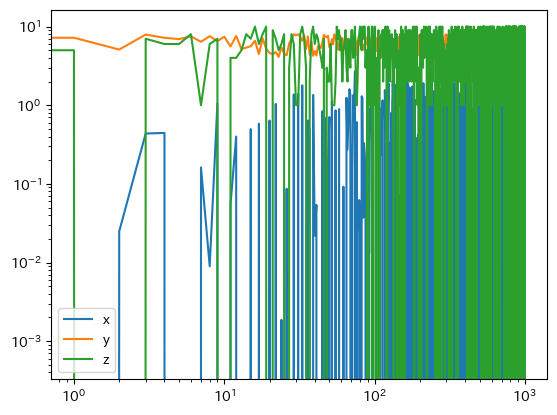

In [162]:
data.plot(logx=True)
data.plot(logy=True)
data.plot(logx=True, logy=True)
data.plot(loglog=True)

- ``logx=True``でX軸を対数にした片対数グラフ
- ``logy=True``でY軸を対数にした片対数グラフ
- ``loglog=True``（もしくは ``logx=True, logy=True``）で両対数グラフ

<Axes: title={'center': '積み上げヒストグラム'}, ylabel='Frequency'>

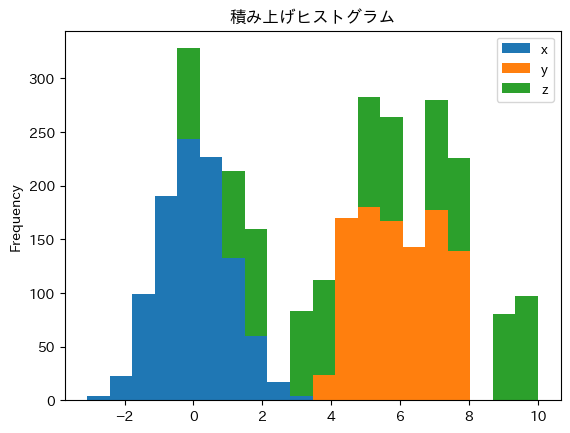

In [176]:
data.plot(kind="hist", stacked=True, bins=20, title="積み上げヒストグラム")

# グラフの種類を変更したい

<Axes: title={'center': 'ヒストグラム'}, ylabel='Frequency'>

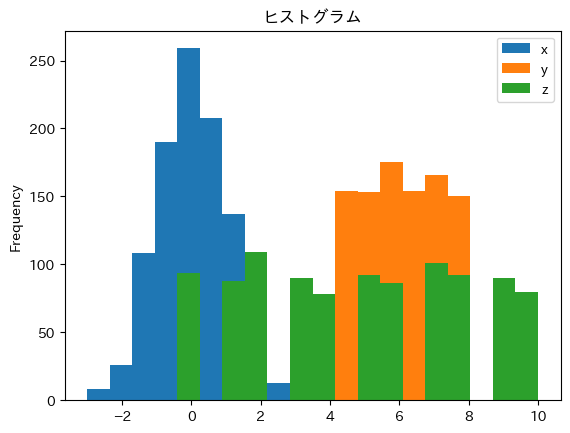

In [122]:
data.plot(kind="hist", title="ヒストグラム", bins=20)

- ``kind``オプションでグラフの種類を変更できる
- ``bins``オプションでビン数を変更できる

<Axes: xlabel='name'>

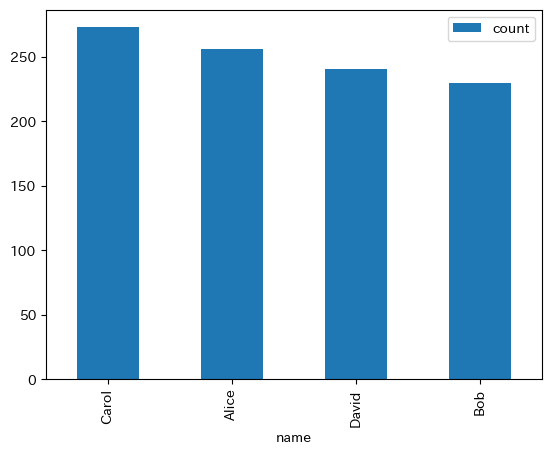

In [142]:
count = data["name"].value_counts().reset_index()
count.plot(kind="bar", x="name", y="count")

<Axes: xlabel='name'>

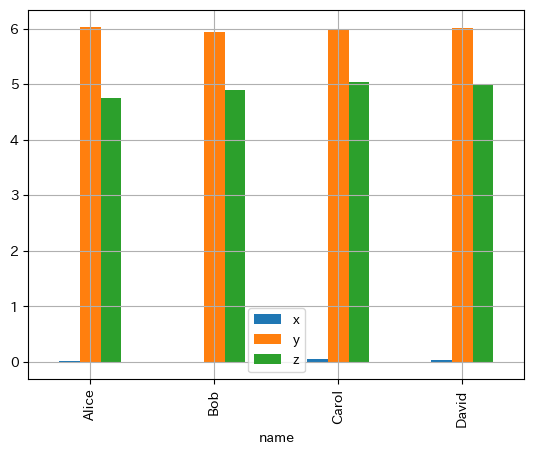

In [153]:
count = data.groupby(["name"]).mean().reset_index()
count.plot(kind="bar", x="name", grid=True)